In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from google.colab import files
import os

# Create the directory at the root level
folder_path = '/processed_csv'
os.makedirs(folder_path, exist_ok=True)

# Upload files
uploaded = files.upload()

# Move uploaded files to the desired folder
for file_name in uploaded.keys():
    os.rename(file_name, os.path.join(folder_path, file_name))

Saving processed_NHarea.csv to processed_NHarea.csv
Saving processed_NHextent.csv to processed_NHextent.csv
Saving processed_NHicechange.csv to processed_NHicechange.csv
Saving processed_precipitation.csv to processed_precipitation.csv
Saving processed_seapressure.csv to processed_seapressure.csv
Saving processed_seasurfacetemp.csv to processed_seasurfacetemp.csv
Saving processed_SHarea.csv to processed_SHarea.csv
Saving processed_SHextent.csv to processed_SHextent.csv
Saving processed_SHicechange.csv to processed_SHicechange.csv
Saving processed_surfaceairtemp.csv to processed_surfaceairtemp.csv
Saving Sea Level Data.csv to Sea Level Data.csv


# **Exploratory Data Analysis**



**BASIC DATA PREPROCESSING**


In [42]:
datasets=[] # This list will contain the dataframes of all the datasets

In [43]:
data1 = pd.read_csv(r'/processed_csv/Sea Level Data.csv')   # Sea Level Data
# Dropping unwanted coluumn
data1.drop(labels = ['GMSL uncertainty'], axis = 1, inplace = True)
# Renaming the column
data1 = data1.rename(columns = {'GMSL':'Global Mean Sea Level'})

print(data1.info())
print(data1.describe())

# Mapping month names to numbers
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Converting month names to numbers
data1['Month'] = data1['Month'].map(month_mapping)

print("\n",data1.info())

datasets.append(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   432 non-null    int64  
 1   Month                  432 non-null    object 
 2   Global Mean Sea Level  432 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.2+ KB
None
              Year  Global Mean Sea Level
count   432.000000             432.000000
mean   1995.500000              17.407176
std      10.400339              27.732533
min    1978.000000             -28.000000
25%    1986.750000              -4.400000
50%    1995.500000               8.750000
75%    2004.250000              37.425000
max    2013.000000              82.400000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 ------

In [44]:
data2 = pd.read_csv(r'/processed_csv/processed_NHarea.csv')   # NH Area

print(data2.info())
print(data2.describe())

# checking for null values
print("\n NULL VALUES")
print(data2.isnull().sum())

# Handling null values
data2['nh_area'] = data2.groupby('Month')['nh_area'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data2.isnull().sum())

datasets.append(data2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     564 non-null    int64  
 1   Month    564 non-null    int64  
 2   nh_area  545 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month     nh_area
count   564.000000  564.000000  545.000000
mean   2001.000000    6.500000    9.282530
std      13.576701    3.455117    3.249633
min    1978.000000    1.000000    2.406000
25%    1989.000000    3.750000    6.265000
50%    2001.000000    6.500000   10.164000
75%    2013.000000    9.250000   12.297000
max    2024.000000   12.000000   13.903000

 NULL VALUES
Year        0
Month       0
nh_area    19
dtype: int64

 NULL VALUES AFTER FILLING
Year       0
Month      0
nh_area    0
dtype: int64


In [45]:
data3 = pd.read_csv(r"/processed_csv/processed_NHextent.csv")   # NH Extent

print(data3.info())
print(data3.describe())

# checking for null values
print("\n NULL VALUES")
print(data3.isnull().sum())

# Handling null values
data3['nh_extent'] = data3.groupby('Month')['nh_extent'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data3.isnull().sum())

datasets.append(data3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       564 non-null    int64  
 1   Month      564 non-null    int64  
 2   nh_extent  546 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month   nh_extent
count   564.000000  564.000000  546.000000
mean   2001.000000    6.500000   11.369203
std      13.576701    3.455117    3.261465
min    1978.000000    1.000000    3.566000
25%    1989.000000    3.750000    8.549750
50%    2001.000000    6.500000   12.064500
75%    2013.000000    9.250000   14.285750
max    2024.000000   12.000000   16.342000

 NULL VALUES
Year          0
Month         0
nh_extent    18
dtype: int64

 NULL VALUES AFTER FILLING
Year         0
Month        0
nh_extent    0
dtype: int64


In [46]:
data4= pd.read_csv(r"/processed_csv/processed_NHicechange.csv")   # NH Ice Change

print(data4.info())
print(data4.describe())

# checking for null values
print("\n NULL VALUES")
print(data4.isnull().sum())

# Handling null values
data4['nh_icechange'] = data4.groupby('Month')['nh_icechange'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data4.isnull().sum())

datasets.append(data4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          564 non-null    int64  
 1   Month         564 non-null    int64  
 2   nh_icechange  546 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month  nh_icechange
count   564.000000  564.000000  5.460000e+02
mean   2001.000000    6.500000 -2.615385e+03
std      13.576701    3.455117  6.905991e+05
min    1978.000000    1.000000 -1.400000e+06
25%    1989.000000    3.750000 -5.890000e+05
50%    2001.000000    6.500000 -2.400000e+04
75%    2013.000000    9.250000  6.087500e+05
max    2024.000000   12.000000  1.630000e+06

 NULL VALUES
Year             0
Month            0
nh_icechange    18
dtype: int64

 NULL VALUES AFTER FILLING
Year            0
Month           0
nh_icechange    0
dtype: int64


In [47]:
data5= pd.read_csv(r"/processed_csv/processed_precipitation.csv")   # Precipitation

print(data5.info())
print(data5.describe())

datasets.append(data5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1128 non-null   int64  
 1   Month        1128 non-null   int64  
 2   pr_mm_month  1128 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 26.6 KB
None
              Year        Month  pr_mm_month
count  1128.000000  1128.000000  1128.000000
mean   1967.500000     6.500000    72.308414
std      27.145963     3.453584     3.261441
min    1921.000000     1.000000    62.249505
25%    1944.000000     3.750000    70.434542
50%    1967.500000     6.500000    72.428649
75%    1991.000000     9.250000    73.918058
max    2014.000000    12.000000    79.417104


In [48]:
data6= pd.read_csv(r"/processed_csv/processed_seapressure.csv")   # Sea Pressure

print(data6.info())
print(data6.describe())

# Renaming the column
data6= data6.rename(columns = {'psl':'Sea_pressure'})

datasets.append(data6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1128 non-null   int64  
 1   Month   1128 non-null   int64  
 2   psl     1128 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 26.6 KB
None
              Year        Month          psl
count  1128.000000  1128.000000  1128.000000
mean   1967.500000     6.500000  1007.981805
std      27.145963     3.453584     0.938731
min    1921.000000     1.000000  1005.212300
25%    1944.000000     3.750000  1007.338590
50%    1967.500000     6.500000  1007.994970
75%    1991.000000     9.250000  1008.623108
max    2014.000000    12.000000  1010.669100


In [49]:
data7= pd.read_csv(r"/processed_csv/processed_seasurfacetemp.csv")   # Sea Surface Temparature

print(data7.info())
print(data7.describe())

# Renaming the column
data7= data7.rename(columns = {'tos':'Seasurface_temp'})

datasets.append(data7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1128 non-null   int64  
 1   Month   1128 non-null   int64  
 2   tos     1128 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 26.6 KB
None
              Year        Month          tos
count  1128.000000  1128.000000  1128.000000
mean   1967.500000     6.500000    12.951461
std      27.145963     3.453584     0.283833
min    1921.000000     1.000000    12.240528
25%    1944.000000     3.750000    12.743520
50%    1967.500000     6.500000    12.943600
75%    1991.000000     9.250000    13.139575
max    2014.000000    12.000000    13.765165


In [50]:
data8= pd.read_csv(r"/processed_csv/processed_surfaceairtemp.csv")   # Surface Air Temperature

print(data8.info())
print(data8.describe())

# Renaming the column
data8= data8.rename(columns = {'tas':'Surface_air_temp'})

datasets.append(data8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1128 non-null   int64  
 1   Month   1128 non-null   int64  
 2   tas     1128 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 26.6 KB
None
              Year        Month          tas
count  1128.000000  1128.000000  1128.000000
mean   1967.500000     6.500000     3.702176
std      27.145963     3.453584     1.835966
min    1921.000000     1.000000     0.485363
25%    1944.000000     3.750000     2.067155
50%    1967.500000     6.500000     3.196374
75%    1991.000000     9.250000     5.624439
max    2014.000000    12.000000     7.423413


In [51]:
data9= pd.read_csv(r"/processed_csv/processed_SHarea.csv")   # SH Area

print(data9.info())
print(data9.describe())

# checking for null values
print("\n NULL VALUES")
print(data9.isnull().sum())

# Handling null values
data9['sh_area'] = data9.groupby('Month')['sh_area'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data9.isnull().sum())

datasets.append(data9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     564 non-null    int64  
 1   Month    564 non-null    int64  
 2   sh_area  546 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month     sh_area
count   564.000000  564.000000  546.000000
mean   2001.000000    6.500000    8.707322
std      13.576701    3.455117    4.596344
min    1978.000000    1.000000    1.151000
25%    1989.000000    3.750000    4.071500
50%    2001.000000    6.500000    8.842000
75%    2013.000000    9.250000   13.319250
max    2024.000000   12.000000   15.750000

 NULL VALUES
Year        0
Month       0
sh_area    18
dtype: int64

 NULL VALUES AFTER FILLING
Year       0
Month      0
sh_area    0
dtype: int64


In [52]:
data10= pd.read_csv(r"/processed_csv/processed_SHextent.csv")   # SH Extent

print(data10.info())
print(data10.describe())

# checking for null values
print("\n NULL VALUES")
print(data10.isnull().sum())


# Handling null values
data10['sh_extent'] = data10.groupby('Month')['sh_extent'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data10.isnull().sum())

datasets.append(data10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       564 non-null    int64  
 1   Month      564 non-null    int64  
 2   sh_extent  546 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month   sh_extent
count   564.000000  564.000000  546.000000
mean   2001.000000    6.500000   11.486874
std      13.576701    3.455117    5.591720
min    1978.000000    1.000000    1.913000
25%    1989.000000    3.750000    5.789250
50%    2001.000000    6.500000   11.809000
75%    2013.000000    9.250000   16.794500
max    2024.000000   12.000000   19.756000

 NULL VALUES
Year          0
Month         0
sh_extent    18
dtype: int64

 NULL VALUES AFTER FILLING
Year         0
Month        0
sh_extent    0
dtype: int64


In [53]:
data11= pd.read_csv(r"/processed_csv/processed_SHicechange.csv")   # SH Ice Change

print(data11.info())
print(data11.describe())

# checking for null values
print("\n NULL VALUES")
print(data11.isnull().sum())

# Handling null values
data11['sh_icechange'] = data11.groupby('Month')['sh_icechange'].transform(lambda x: x.fillna(x.mean()))

#checking for null values after filling
print("\n NULL VALUES AFTER FILLING")
print(data11.isnull().sum())

datasets.append(data11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          564 non-null    int64  
 1   Month         564 non-null    int64  
 2   sh_icechange  546 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 13.3 KB
None
              Year       Month  sh_icechange
count   564.000000  564.000000  5.460000e+02
mean   2001.000000    6.500000  3.990842e+03
std      13.576701    3.455117  1.200379e+06
min    1978.000000    1.000000 -3.188000e+06
25%    1989.000000    3.750000 -6.202500e+05
50%    2001.000000    6.500000  3.375000e+05
75%    2013.000000    9.250000  1.022250e+06
max    2024.000000   12.000000  1.635000e+06

 NULL VALUES
Year             0
Month            0
sh_icechange    18
dtype: int64

 NULL VALUES AFTER FILLING
Year            0
Month           0
sh_icechange    0
dtype: int64


**MERGING THE DATASETS**


In [54]:

merged_df = datasets[0]
for df in datasets[1:]:
  merged_df = pd.merge(merged_df, df, on=['Year','Month'], how='inner')

merged_df.head(100)


,Year,Month,Global Mean Sea Level,nh_area,nh_extent,nh_icechange,pr_mm_month,Sea_pressure,Seasurface_temp,Surface_air_temp,sh_area,sh_extent,sh_icechange
0,1978,1,-15.7,12.186622,14.181978,504711.111111,71.525605,1009.73540,13.212856,1.848322,3.210489,4.909622,-1.447644e+06
1,1978,2,-12.0,12.966761,15.059326,227782.608696,64.217540,1008.87230,13.445392,2.096284,1.946152,2.992522,-2.970217e+05
2,1978,3,-13.0,13.115152,15.216652,-71326.086957,71.674122,1008.77360,13.351264,1.898209,2.633870,3.951696,8.191957e+05
3,1978,4,-13.3,12.484130,14.491913,-408152.173913,69.513546,1008.37790,13.126515,2.766380,4.990022,6.780413,1.207870e+06
4,1978,5,-17.0,11.051848,13.099543,-575695.652174,73.112906,1009.03015,12.924008,5.058899,7.797261,10.084326,1.286348e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1985,12,-12.2,10.240000,13.050000,706000.000000,69.107066,1009.98050,12.705615,1.972485,7.456000,11.352000,-2.491000e+06
96,1986,1,-10.8,11.882000,14.890000,609000.000000,71.818879,1009.24010,13.121903,1.803450,3.428000,5.422000,-1.746000e+06
97,1986,2,-9.7,12.617000,15.785000,294000.000000,64.726687,1008.08910,13.346566,1.596439,1.996000,3.193000,-3.310000e+05
98,1986,3,-10.3,12.721000,15.910000,-139000.000000,72.022781,1008.20496,13.266764,1.788374,2.379000,3.698000,6.710000e+05


In [55]:
# SHIFTING THE COLUMN 'GLOBAL MEAN SEA LEVEL' TO THE EXTREME RIGHT

col_to_move = 'Global Mean Sea Level'
merged_df = merged_df[[col for col in merged_df if col != col_to_move] + [col_to_move]]

merged_df.head(100)

,Year,Month,nh_area,nh_extent,nh_icechange,pr_mm_month,Sea_pressure,Seasurface_temp,Surface_air_temp,sh_area,sh_extent,sh_icechange,Global Mean Sea Level
0,1978,1,12.186622,14.181978,504711.111111,71.525605,1009.73540,13.212856,1.848322,3.210489,4.909622,-1.447644e+06,-15.7
1,1978,2,12.966761,15.059326,227782.608696,64.217540,1008.87230,13.445392,2.096284,1.946152,2.992522,-2.970217e+05,-12.0
2,1978,3,13.115152,15.216652,-71326.086957,71.674122,1008.77360,13.351264,1.898209,2.633870,3.951696,8.191957e+05,-13.0
3,1978,4,12.484130,14.491913,-408152.173913,69.513546,1008.37790,13.126515,2.766380,4.990022,6.780413,1.207870e+06,-13.3
4,1978,5,11.051848,13.099543,-575695.652174,73.112906,1009.03015,12.924008,5.058899,7.797261,10.084326,1.286348e+06,-17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1985,12,10.240000,13.050000,706000.000000,69.107066,1009.98050,12.705615,1.972485,7.456000,11.352000,-2.491000e+06,-12.2
96,1986,1,11.882000,14.890000,609000.000000,71.818879,1009.24010,13.121903,1.803450,3.428000,5.422000,-1.746000e+06,-10.8
97,1986,2,12.617000,15.785000,294000.000000,64.726687,1008.08910,13.346566,1.596439,1.996000,3.193000,-3.310000e+05,-9.7
98,1986,3,12.721000,15.910000,-139000.000000,72.022781,1008.20496,13.266764,1.788374,2.379000,3.698000,6.710000e+05,-10.3


**DATA VISULIZATION**

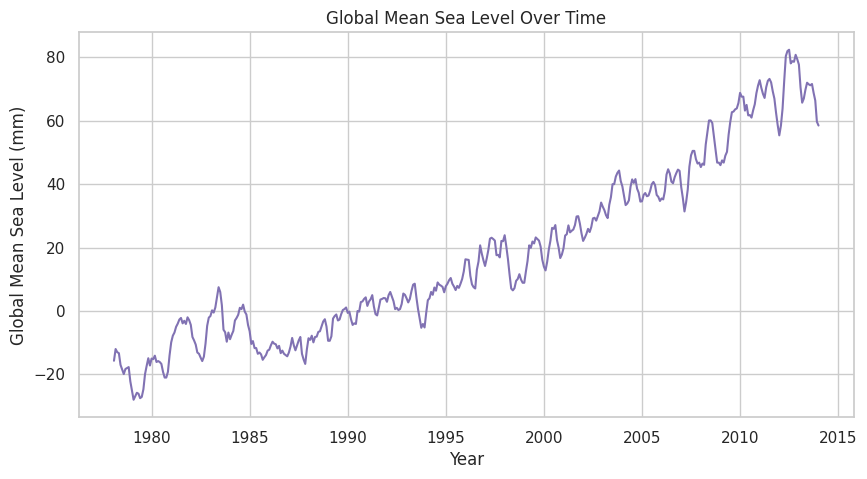

In [56]:
'''
Line chart showing variation of Global Mean Sea Level with Years
'''
# Create a continuous time variable
merged_df['Time'] = merged_df['Year'] + merged_df['Month'] / 12

# Plotting
plt.figure(figsize=(10,5))
plt.plot(merged_df['Time'], merged_df['Global Mean Sea Level'], marker=None, color='m')

plt.xlabel('Year')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Global Mean Sea Level Over Time')
plt.grid(True)
plt.show()



In [57]:
merged_df.head(100)

,Year,Month,nh_area,nh_extent,nh_icechange,pr_mm_month,Sea_pressure,Seasurface_temp,Surface_air_temp,sh_area,sh_extent,sh_icechange,Global Mean Sea Level,Time
0,1978,1,12.186622,14.181978,504711.111111,71.525605,1009.73540,13.212856,1.848322,3.210489,4.909622,-1.447644e+06,-15.7,1978.083333
1,1978,2,12.966761,15.059326,227782.608696,64.217540,1008.87230,13.445392,2.096284,1.946152,2.992522,-2.970217e+05,-12.0,1978.166667
2,1978,3,13.115152,15.216652,-71326.086957,71.674122,1008.77360,13.351264,1.898209,2.633870,3.951696,8.191957e+05,-13.0,1978.250000
3,1978,4,12.484130,14.491913,-408152.173913,69.513546,1008.37790,13.126515,2.766380,4.990022,6.780413,1.207870e+06,-13.3,1978.333333
4,1978,5,11.051848,13.099543,-575695.652174,73.112906,1009.03015,12.924008,5.058899,7.797261,10.084326,1.286348e+06,-17.0,1978.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1985,12,10.240000,13.050000,706000.000000,69.107066,1009.98050,12.705615,1.972485,7.456000,11.352000,-2.491000e+06,-12.2,1986.000000
96,1986,1,11.882000,14.890000,609000.000000,71.818879,1009.24010,13.121903,1.803450,3.428000,5.422000,-1.746000e+06,-10.8,1986.083333
97,1986,2,12.617000,15.785000,294000.000000,64.726687,1008.08910,13.346566,1.596439,1.996000,3.193000,-3.310000e+05,-9.7,1986.166667
98,1986,3,12.721000,15.910000,-139000.000000,72.022781,1008.20496,13.266764,1.788374,2.379000,3.698000,6.710000e+05,-10.3,1986.250000


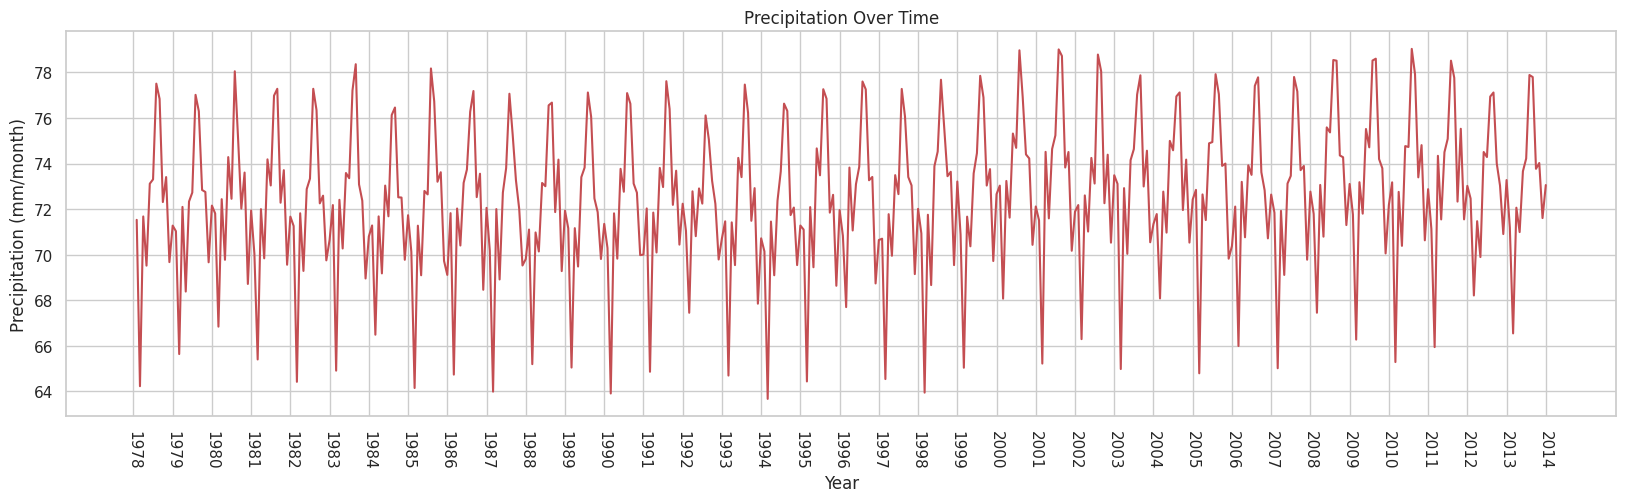

In [58]:
'''
Line chart showing variation of precipitation Area with Years
'''
# Create a continuous time variable
merged_df['Time'] = merged_df['Year'] + merged_df['Month'] / 12

# Plotting
plt.figure(figsize=(20,5))
plt.plot(merged_df['Time'], merged_df['pr_mm_month'], marker=None, color='r')

plt.xlabel('Year')
plt.ylabel('Precipitation (mm/month)')
plt.title('Precipitation Over Time')
plt.grid(True)
#plt.xticks(ticks=merged_df['Year'].unique(), rotation=90)
xticks = np.arange(1978,2015,1)
plt.xticks(xticks,rotation=270)
plt.show()

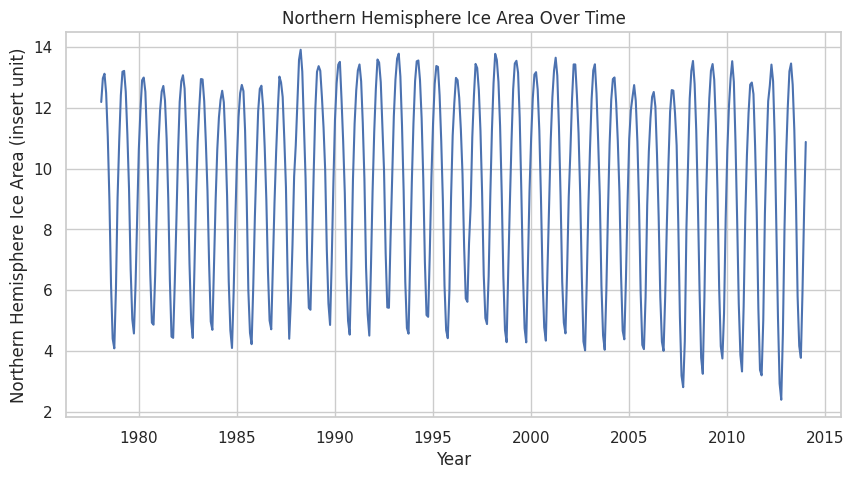

In [59]:
'''
Line chart showing variation of Northern Hemisphere Ice Area with Years
'''
# Create a continuous time variable
merged_df['Time'] = merged_df['Year'] + merged_df['Month'] / 12

# Plotting
plt.figure(figsize=(10,5))
plt.plot(merged_df['Time'], merged_df['nh_area'], marker=None, color='b')

plt.xlabel('Year')
plt.ylabel('Northern Hemisphere Ice Area (insert unit)')
plt.title('Northern Hemisphere Ice Area Over Time')
plt.grid(True)
#plt.xticks(ticks=merged_df['Year'].unique(), rotation=90)
plt.show()

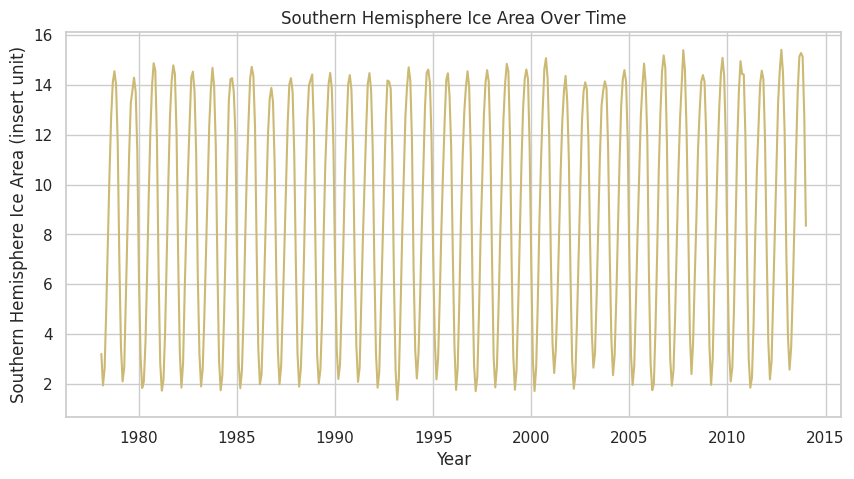

In [60]:
'''
Line chart showing variation of Southern Hemisphere Ice Area with Years
'''
# Create a continuous time variable
merged_df['Time'] = merged_df['Year'] + merged_df['Month'] / 12

# Plotting
plt.figure(figsize=(10,5))
plt.plot(merged_df['Time'], merged_df['sh_area'], marker=None, color='y')

plt.xlabel('Year')
plt.ylabel('Southern Hemisphere Ice Area (insert unit)')
plt.title('Southern Hemisphere Ice Area Over Time')
plt.grid(True)
plt.show()

<ipython-input-61-e74a547ff66e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="ch:start=.5,rot=-0.75")


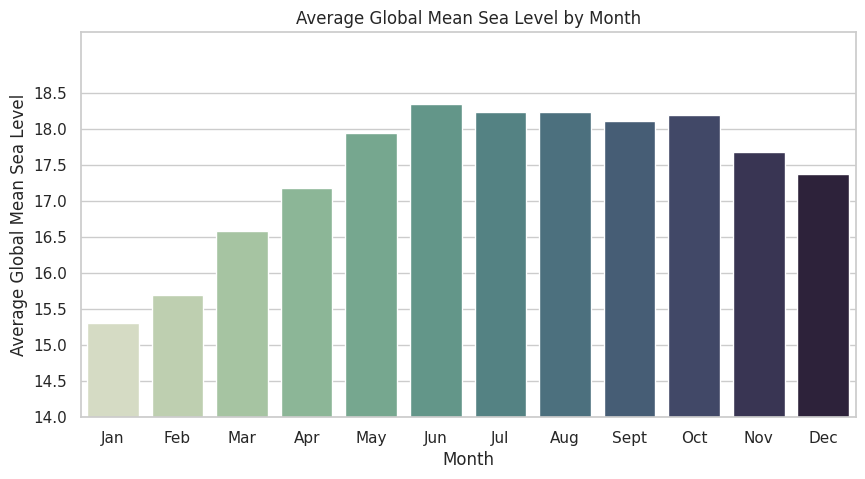

In [61]:
'''
Comparing the Average Sea level rise for each month
'''
#data9['sh_area'] = data9.groupby('Month')['sh_area'].transform(lambda x: x.fillna(x.mean()))
x=np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
y=np.array([merged_df[merged_df['Month'] == i]['Global Mean Sea Level'].mean() for i in range(1,13)])

# Plotting the barplot
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="ch:start=.5,rot=-0.75")
plt.xlabel('Month')
plt.ylabel('Average Global Mean Sea Level')
plt.title('Average Global Mean Sea Level by Month')
plt.ylim(y.min() - 1, y.max() + 1)  # Adjust limits to zoom in
yticks = np.arange(int(y.min()) - 1, int(y.max()) + 1, 0.5)  # Adjust step size as needed
plt.yticks(yticks)
plt.show()

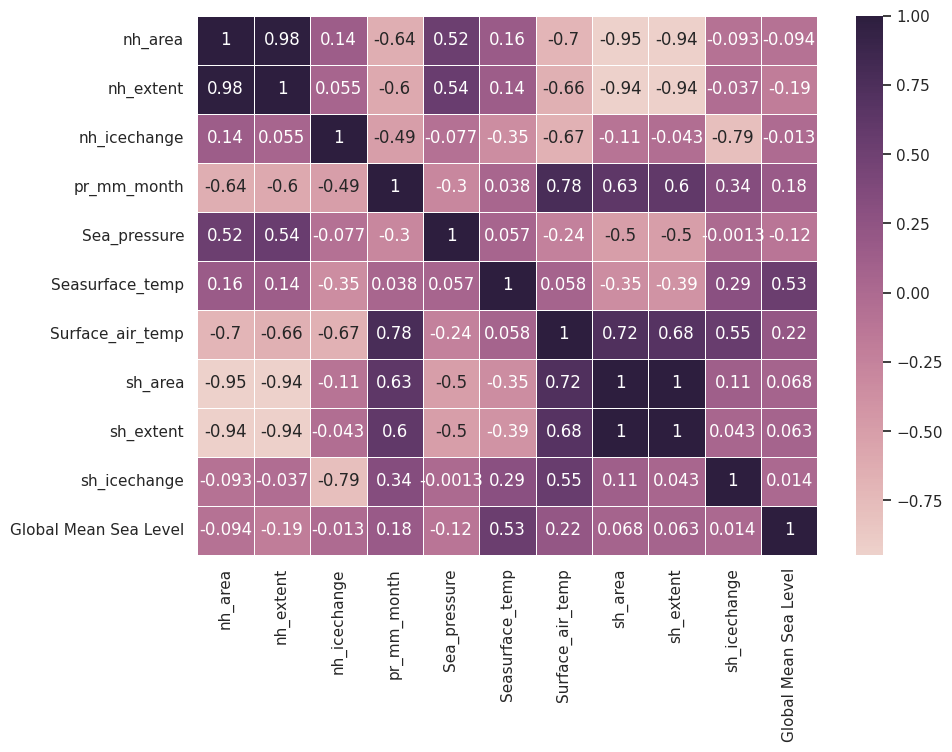

In [62]:
'''
Correlation Matrix between columns of the dataframe
'''
correlation_df=merged_df.drop(['Year', 'Month','Time'], axis=1)

#Creating Correlation Matrix
correlation_matrix = correlation_df.corr()

#Plotting
fig=plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidths=0.5, linecolor='white')

plt.show()

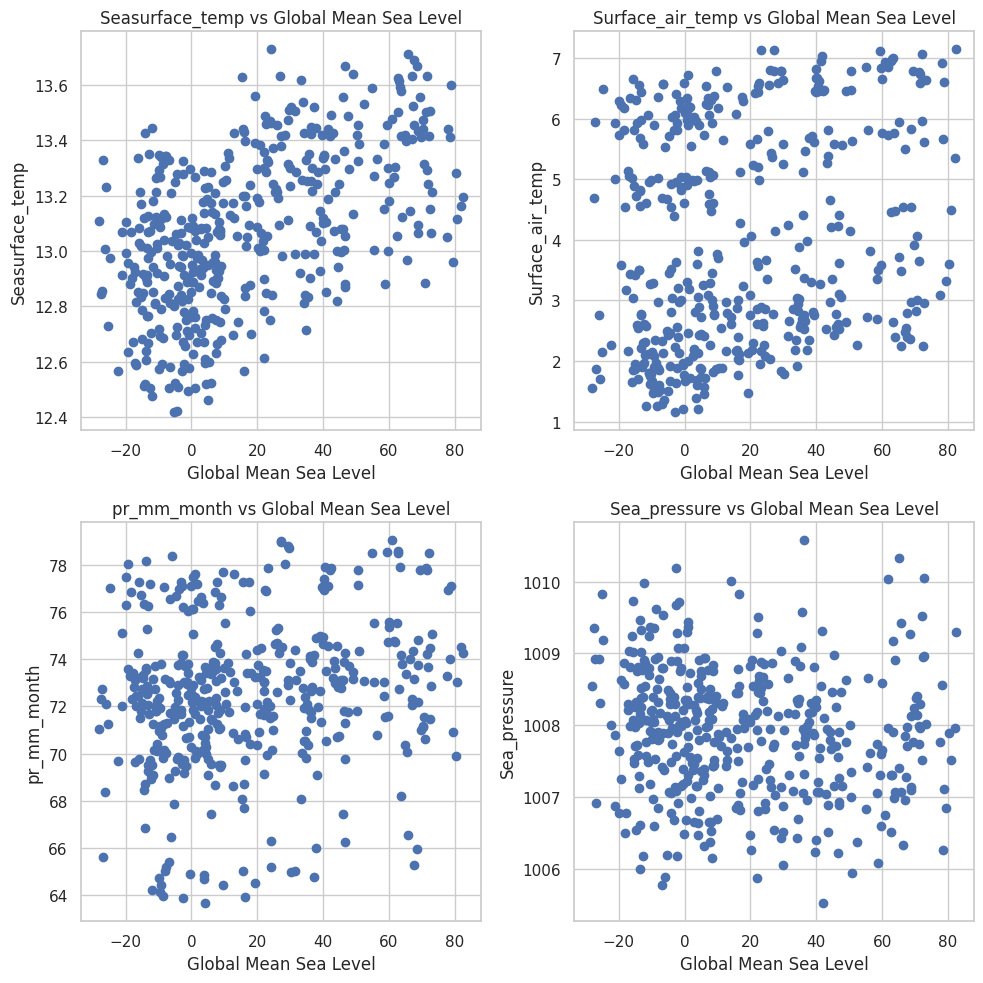

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Top features based on absolute correlation (replace with your actual top features)
top_features = ["Seasurface_temp", "Surface_air_temp", "pr_mm_month", "Sea_pressure"]

# Create a figure for plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Loop through each top feature and create a scatter plot
for i, feature in enumerate(top_features):
    row, col = divmod(i, 2)
    axes[row, col].scatter(merged_df["Global Mean Sea Level"], merged_df[feature])
    axes[row, col].set_title(f"{feature} vs Global Mean Sea Level")
    axes[row, col].set_xlabel("Global Mean Sea Level")
    axes[row, col].set_ylabel(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

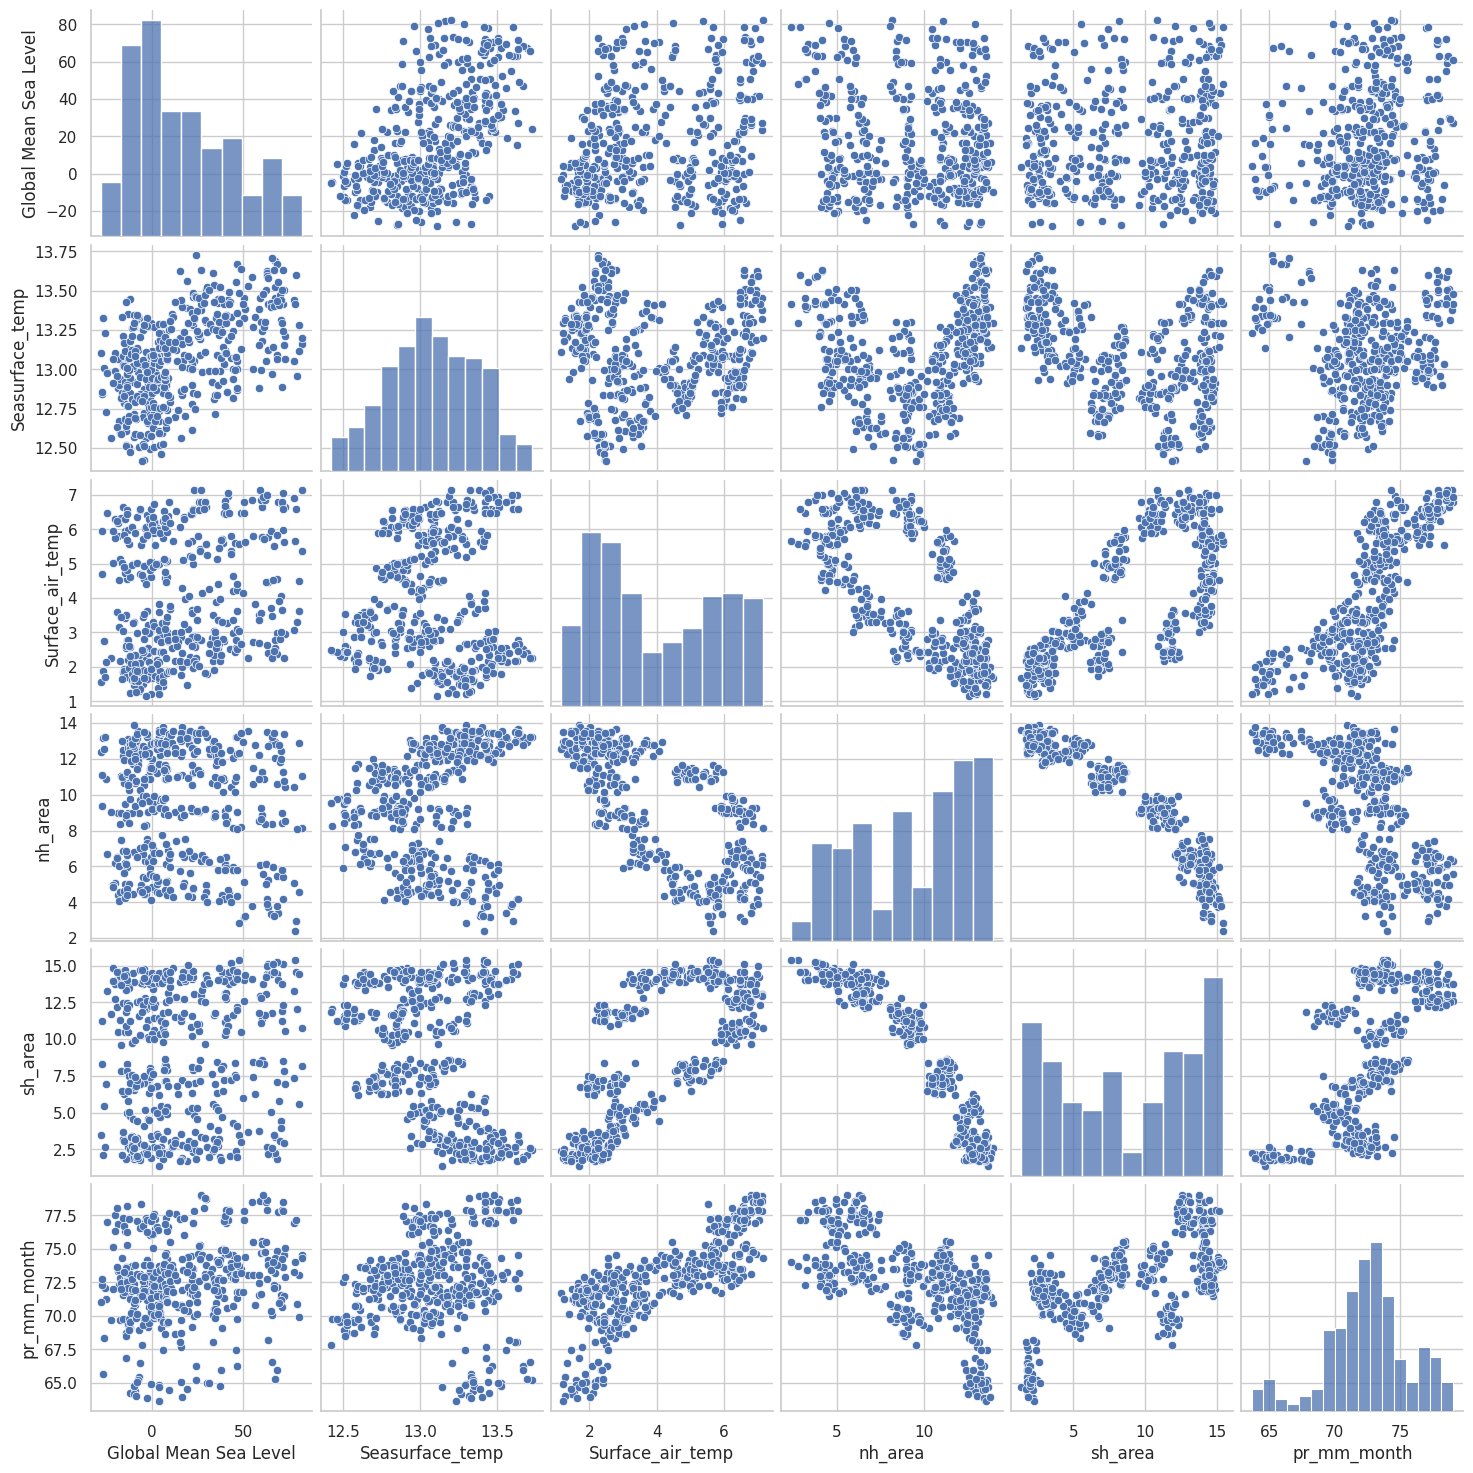

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'merged_df'
features = ['Global Mean Sea Level', 'Seasurface_temp', 'Surface_air_temp', 'nh_area', 'sh_area', 'pr_mm_month']
df = merged_df[features]

# Create scatter plots (adjust figure size and layout as needed)
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()

# **Splitting and Training Dataset on various Models**


In [65]:
# input
x = merged_df.iloc[:, :-2].values

# output
y = merged_df.iloc[:, -2].values

# x,y

x_filtered = merged_df.iloc[:, 2 :-2].values
x_filtered

array([[ 1.21866222e+01,  1.41819778e+01,  5.04711111e+05, ...,
         3.21048889e+00,  4.90962222e+00, -1.44764444e+06],
       [ 1.29667609e+01,  1.50593261e+01,  2.27782609e+05, ...,
         1.94615217e+00,  2.99252174e+00, -2.97021739e+05],
       [ 1.31151522e+01,  1.52166522e+01, -7.13260870e+04, ...,
         2.63386957e+00,  3.95169565e+00,  8.19195652e+05],
       ...,
       [ 5.95400000e+00,  7.45500000e+00,  1.25100000e+06, ...,
         1.51290000e+01,  1.90180000e+01, -4.38000000e+05],
       [ 8.65900000e+00,  9.93900000e+00,  8.50000000e+05, ...,
         1.27690000e+01,  1.68720000e+01, -1.17900000e+06],
       [ 1.08740000e+01,  1.21840000e+01,  7.17000000e+05, ...,
         8.34400000e+00,  1.18540000e+01, -2.40900000e+06]])

In [66]:
# FEATURE ENGINEERING

# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(x_filtered)
scaledfeatures[0]

array([ 0.87723487,  0.81237466,  0.74762625, -0.29203496,  2.0461868 ,
        0.47034655, -1.19831752, -1.22029566, -1.2030191 , -1.2113335 ])

In [67]:
# SELECTING BEST FEATURES

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(scaledfeatures, y)

# Select the 'Time' columns from the original DataFrame
year_month = merged_df[['Time']].values

# Concatenate 'Time' columns with the selected features in X_new
X_final = np.concatenate([year_month, X_new], axis=1)

print(X_final)

[[ 1.97808333e+03  7.47626248e-01 -2.92034964e-01  4.70346548e-01
  -1.19831752e+00 -1.21133350e+00]
 [ 1.97816667e+03  3.38725370e-01 -2.58080556e+00  1.28456499e+00
  -1.05977784e+00 -2.49545816e-01]
 [ 1.97825000e+03 -1.02925841e-01 -2.45521632e-01  9.54978375e-01
  -1.17044484e+00  6.83483001e-01]
 ...
 [ 2.01383333e+03  1.84956476e+00  4.90015819e-01  2.28744935e-01
   3.04340499e-01 -3.67387360e-01]
 [ 2.01391667e+03  1.25746517e+00 -2.67806789e-01 -2.79658390e-01
  -2.31650410e-01 -9.86777775e-01]
 [ 2.01400000e+03  1.06108302e+00  1.86432562e-01  2.61196584e-01
  -3.55459965e-01 -2.01491571e+00]]


In [68]:
# SPLITTING THE DATASET
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Regression Algorithms
model = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
}

print(len(X_train))
print(len(X_test))


345
87


In [69]:
heatmap_data=[]

In [70]:

# Train and evaluate models
results = {}
for model_name, model in model.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {metrics['MSE']}")
    print(f"Mean Absolute Error: {metrics['MAE']}")
    print(f"R-squared: {metrics['R2']}\n")

heatmap_data.append([results['Linear Regression']['MSE'],results['Linear Regression']['MAE'],results['Linear Regression']['R2']])
heatmap_data.append([results['Random Forest']['MSE'],results['Random Forest']['MAE'],results['Random Forest']['R2']])

Linear Regression Performance:
Mean Squared Error: 68.28528885110832
Mean Absolute Error: 6.66041077932156
R-squared: 0.9233765117782796

Decision Tree Performance:
Mean Squared Error: 13.493333333333332
Mean Absolute Error: 2.6597701149425284
R-squared: 0.9848590189024055

Random Forest Performance:
Mean Squared Error: 8.568677114942531
Mean Absolute Error: 2.304563218390806
R-squared: 0.9903850164356174

Gradient Boosting Performance:
Mean Squared Error: 9.793075417459642
Mean Absolute Error: 2.499604218248371
R-squared: 0.9890111089587643

Support Vector Regressor Performance:
Mean Squared Error: 938.9511810303164
Mean Absolute Error: 25.00551453277023
R-squared: -0.05360489749585562



 **OPTIMISATION**

> GridSearchCV


> XGBoost Regressor









In [71]:
'''
HYPERPARAMTER TUNING OF MODELS USING GRID SEARCH CV
'''

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

# Defining  parameter grids for each model
param_grids = {
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'param_grid': {
            'max_depth': [5, 8, 10, 15, None],
            'min_samples_split': [2, 5, 7, 10],
            'min_samples_leaf': [1, 2, 3, 4, 5]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 3, 4, 5]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'param_grid': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.3]
        }
    }
}

# Initialize the results dictionary
results = {}

# Perform GridSearchCV for each model
for model_name, params in param_grids.items():
    grid_search = GridSearchCV(estimator=params['model'], param_grid=params['param_grid'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predictions and evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results[model_name] = {
        'Best Parameters': best_params,
        'Mean Squared Error': mse,
        'R-squared Score': r2,
        'Mean Absolute Error': mae
    }

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f">> Best Parameters: {metrics['Best Parameters']}")
    print(f">> Mean Squared Error: {metrics['Mean Squared Error']:.4f}")
    print(f">> Mean Absolute Error: {metrics['Mean Absolute Error']:.4f}")
    print(f">> R-squared Score: {metrics['R-squared Score']:.4f}")
    print()

heatmap_data.append([results['Decision Tree']['Mean Squared Error'], results['Decision Tree']['Mean Absolute Error'], results['Decision Tree']['R-squared Score']])
heatmap_data.append([results['Gradient Boosting']['Mean Squared Error'], results['Gradient Boosting']['Mean Absolute Error'], results['Gradient Boosting']['R-squared Score']])
heatmap_data.append([results['Support Vector Regressor']['Mean Squared Error'], results['Support Vector Regressor']['Mean Absolute Error'], results['Support Vector Regressor']['R-squared Score']])


Decision Tree:
>> Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
>> Mean Squared Error: 10.9665
>> Mean Absolute Error: 2.5817
>> R-squared Score: 0.9877

Random Forest:
>> Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
>> Mean Squared Error: 8.6074
>> Mean Absolute Error: 2.3843
>> R-squared Score: 0.9903

Gradient Boosting:
>> Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
>> Mean Squared Error: 7.5356
>> Mean Absolute Error: 2.1523
>> R-squared Score: 0.9915

Support Vector Regressor:
>> Best Parameters: {'C': 1, 'epsilon': 0.3, 'kernel': 'linear'}
>> Mean Squared Error: 81.4095
>> Mean Absolute Error: 7.1671
>> R-squared Score: 0.9086



In [72]:
'''
XG Boost Regressor
'''

from xgboost import XGBRegressor

model=XGBRegressor(random_state=42)

# Applying xg boostregressor
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


Mean Squared Error: 8.3045
Mean Absolute Error: 2.1734
R-squared Score: 0.9907


In [34]:
'''
Grid Search CV for XG Boost Regressor
'''
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 12, 15],
    'min_child_weight': [1, 3, 5, 7,10],

}

# Create the XGBoost regressor
model = XGBRegressor(random_state=42)

# Perform grid search
grid_search=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
final_model=best_model

# Predictions and evaluation
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f">> Mean Squared Error: {mse:.4f}")
print(f">> Mean Absolute Error: {mae:.4f}")
print(f">> R-squared Score: {r2:.4f}")


heatmap_data.append([mse,mae,r2])


>> Mean Squared Error: 6.9746
>> Mean Absolute Error: 2.0549
>> R-squared Score: 0.9922


# **Summary of the best values of various models we got**

**Linear Regression:**
```
>> Mean Squared Error: 68.29
>> Mean Absolute Error: 6.66
>> R-squared: 0.9234
```
**Decision Tree after HyperParameter Tuning with GridSearchCV:**
```
>> Mean Squared Error: 10.97
>> Mean Absolute Error: 2.58
>> R-squared Score: 0.9877

```
**Random Forest:**
```
>> Mean Squared Error: 8.57
>> Mean Absolute Error: 2.30
>> R-squared: 0.9904
```
**Gradient Boosting after HyperParameter Tuning with GridSearchCV:**
```
>> Mean Squared Error: 7.54
>> Mean Absolute Error: 2.15
>> R-squared Score: 0.9915
```
**Support Vector Regressor after HyperParameter Tuning with GridSearchCV:**
```
>> Mean Squared Error: 81.41
>> Mean Absolute Error: 7.17
>> R-squared Score: 0.9086
```
**XGBoost Regressor after HyperParameter Tuning with GridSearchCV:**
```
>> Mean Squared Error: 6.97
>> Mean Absolute Error: 2.06
>> R-squared Score: 0.9922
```






<ipython-input-35-b0e186c4d316>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=metrics_df, palette='viridis')


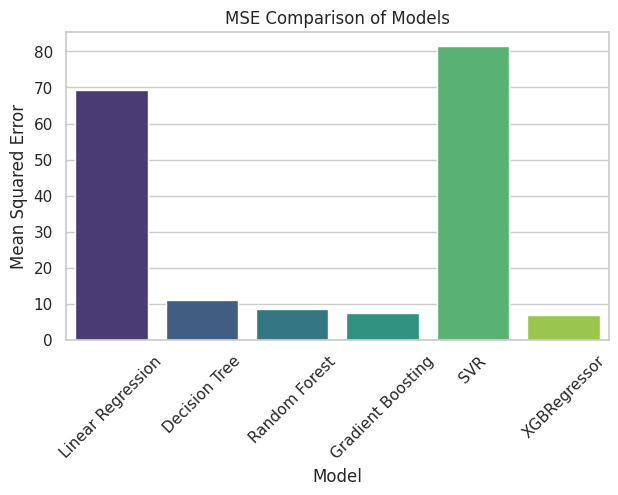

<ipython-input-35-b0e186c4d316>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics_df, palette='OrRd')


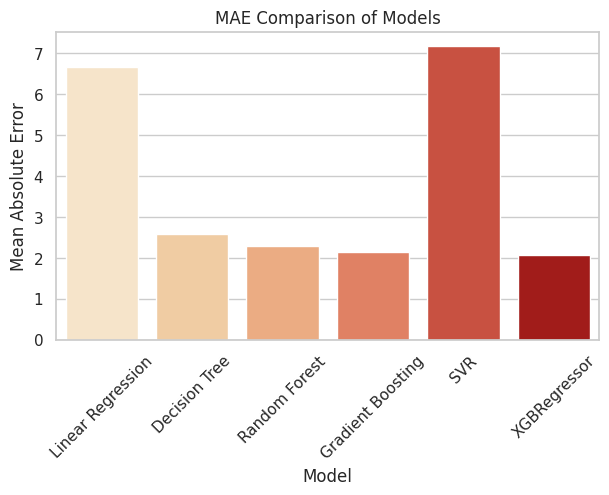

<ipython-input-35-b0e186c4d316>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=metrics_df, palette='magma')


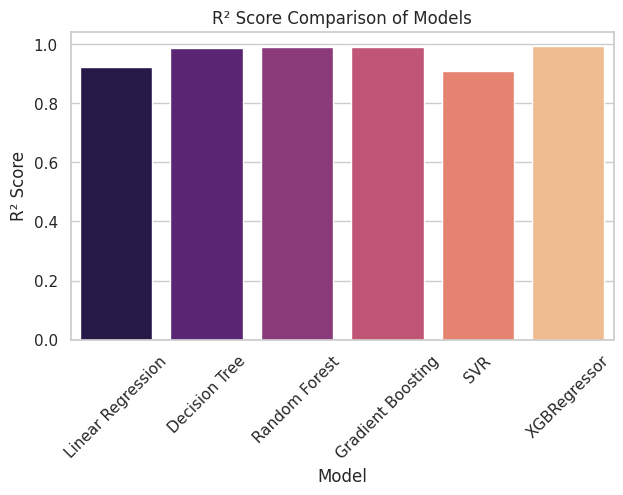

In [35]:
'''
GRAPHICAL REPRESNTATION OF THE ABOVE SUMMARY
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume these are your collected metrics for each model
metrics_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBRegressor'],
    'MSE': [69.29, 10.97, 8.57, 7.54, 81.41, 6.97],
    'MAE': [6.66, 2.58, 2.30, 2.15, 7.17, 2.06],
    'R²': [0.9234, 0.9877, 0.9904, 0.9915, 0.9086, 0.9922]
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set the seaborn style
sns.set(style="whitegrid")

# Plotting MSE
plt.figure(figsize=(7, 4))
sns.barplot(x='Model', y='MSE', data=metrics_df, palette='viridis')
plt.title('MSE Comparison of Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plotting MAE
plt.figure(figsize=(7, 4))
sns.barplot(x='Model', y='MAE', data=metrics_df, palette='OrRd')
plt.title('MAE Comparison of Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

# Plotting R² Score
plt.figure(figsize=(7, 4))
sns.barplot(x='Model', y='R²', data=metrics_df, palette='magma')
plt.title('R² Score Comparison of Models')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()


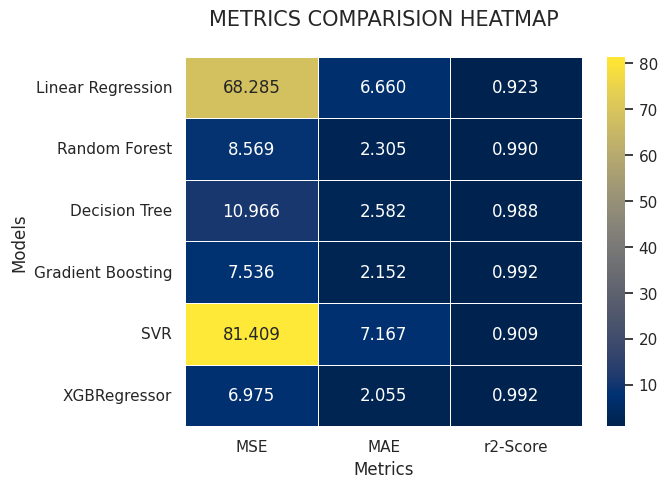

In [36]:
'''
METRICS COMPARISION HEATMAP
'''
xticklabels=['MSE','MAE','r2-Score']
yticklabels=['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'SVR', 'XGBRegressor']
sns.heatmap(heatmap_data,annot=True,fmt='.3f',xticklabels=xticklabels,yticklabels=yticklabels,cmap='cividis',linewidths=0.5, linecolor='white')
plt.xlabel("Metrics",fontsize=12)
plt.ylabel("Models",fontsize=12)
plt.title('METRICS COMPARISION HEATMAP\n',fontsize=15)
plt.show()

# **BEST MODEL:**
**XGBoost Regressoroptimised using GridSearchCV** \
Highest R-squared Score: 0.9922\
Lowest MSE: 6.97\
Lowest MAE: 2.06\
XGBoost Regressor hyperparameter tuned using GridSearchCV has the best overall performance, showing the highest R² score and the lowest errors (MSE and MAE).

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


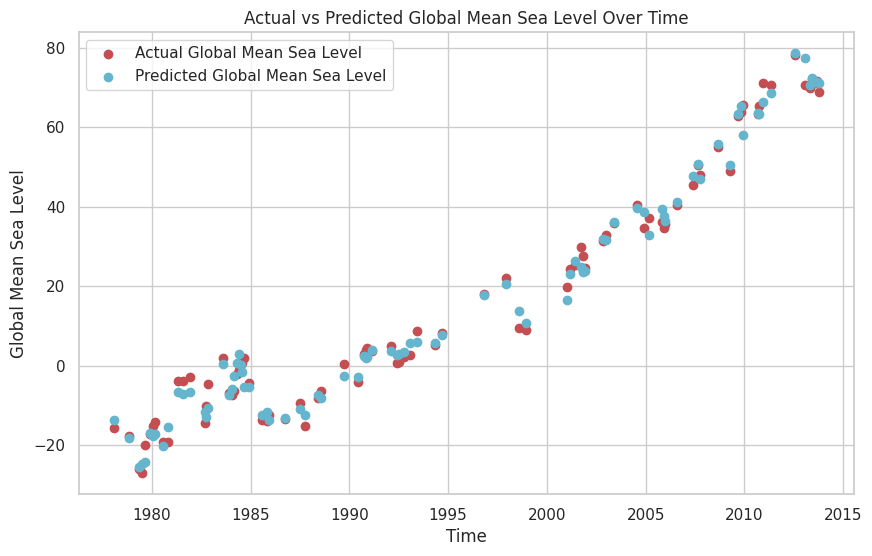

In [37]:
'''
GRAPHICALLY COMPARING THE ACTUAL AND PREDICTED GLOBAL MEAN SEA LEVEL FOR X_test
'''
# Train the model
print(final_model)
model = final_model

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Extract the 'Time' column from X_train and X_test
time_train = X_train[:, 0]
time_test = X_test[:, 0]

# Sort the test set and predictions by time
sorted_idx = np.argsort(time_test, axis=0).flatten()
time_test_sorted = time_test[sorted_idx]
y_test_sorted = y_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot the results as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(time_test_sorted, y_test_sorted, label='Actual Global Mean Sea Level', color='r')
plt.scatter(time_test_sorted, y_pred_sorted, label='Predicted Global Mean Sea Level', color='c')
plt.xlabel('Time')
plt.ylabel('Global Mean Sea Level')
plt.title('Actual vs Predicted Global Mean Sea Level Over Time')
plt.legend()
plt.show()


In [38]:
'''import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

model = final_model

# Input data collection
input_data = {}
year = int(input("Enter the year: "))
month = int(input("Enter the month: "))

# Time
time = year + month / 12
input_data['Time'] = [time]

# Collect other input features
nh_icechange = float(input("Enter the value of nh_icechange: "))
pr_mm_month = float(input("Enter the value of pr_mm_month: "))
Seasurface_temp = float(input("Enter the value of Seasurface_temp: "))
Surface_air_temp = float(input("Enter the value of Surface_air_temp: "))
sh_icechange = float(input("Enter the value of sh_icechange: "))

input_data['nh_icechange'] = [nh_icechange]
input_data['pr_mm_month'] = [pr_mm_month]
input_data['Seasurface_temp'] = [Seasurface_temp]
input_data['Surface_air_temp'] = [Surface_air_temp]
input_data['sh_icechange'] = [sh_icechange]

# Conversion of input data to DataFrame
input_df = pd.DataFrame(input_data)

# Separating 'Time' column and the features to be scaled
time_feature = input_df[['Time']].values
input_features = input_df[['nh_icechange', 'pr_mm_month', 'Seasurface_temp', 'Surface_air_temp', 'sh_icechange']].values

# Scaling the features (excluding 'Time')
input_scaled = scaler.fit_transform(input_features)

# Combine 'Time' column with the scaled features
input_combined = np.concatenate([time_feature, input_scaled], axis=1)

# Predict using the trained model
model.fit(X_train, y_train)
predicted_sea_level = model.predict(input_combined)

print(f"Predicted Global Mean Sea Level for {month}/{year}: {predicted_sea_level[0]}")
'''

'import pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nmodel = final_model\n\n# Input data collection\ninput_data = {}\nyear = int(input("Enter the year: "))\nmonth = int(input("Enter the month: "))\n\n# Time\ntime = year + month / 12\ninput_data[\'Time\'] = [time]\n\n# Collect other input features\nnh_icechange = float(input("Enter the value of nh_icechange: "))\npr_mm_month = float(input("Enter the value of pr_mm_month: "))\nSeasurface_temp = float(input("Enter the value of Seasurface_temp: "))\nSurface_air_temp = float(input("Enter the value of Surface_air_temp: "))\nsh_icechange = float(input("Enter the value of sh_icechange: "))\n\ninput_data[\'nh_icechange\'] = [nh_icechange]\ninput_data[\'pr_mm_month\'] = [pr_mm_month]\ninput_data[\'Seasurface_temp\'] = [Seasurface_temp]\ninput_data[\'Surface_air_temp\'] = [Surface_air_temp]\ninput_data[\'sh_icechange\'] = [sh_icechange]\n\n# Conversion of input data to DataFram

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


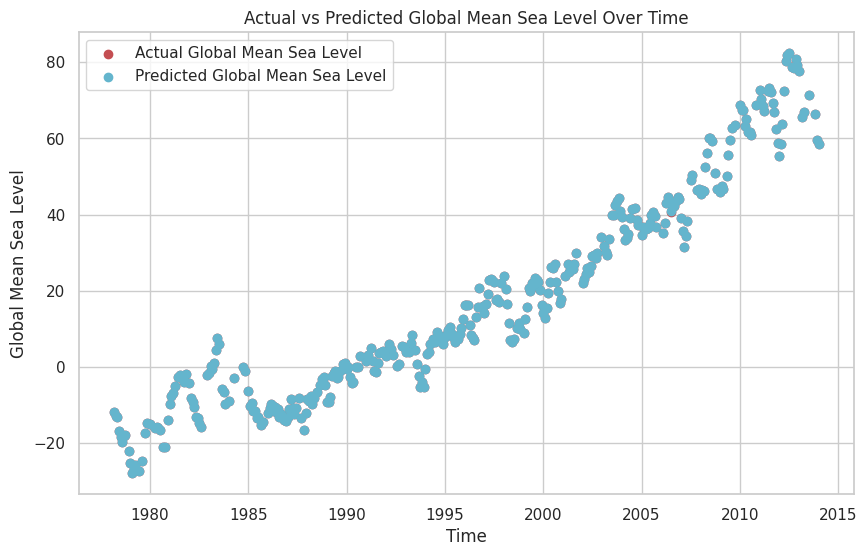

0.9999999860762079


In [39]:
'''
GRAPHICALLY COMPARING THE ACTUAL AND PREDICTED GLOBAL MEAN SEA LEVEL FOR X_tarin
'''
# Train the model
print(final_model)
model = final_model

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Extract the 'Time' column
time_test = X_train[:, 0]

# Sort the test set and predictions by time
sorted_idx = np.argsort(time_test, axis=0).flatten()
time_test_sorted = time_test[sorted_idx]
y_test_sorted = y_train[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot the results as scatter plots
plt.figure(figsize=(10, 6))
plt.scatter (time_test_sorted, y_test_sorted, label='Actual Global Mean Sea Level', color='r')
plt.scatter(time_test_sorted, y_pred_sorted, label='Predicted Global Mean Sea Level', color='c')
plt.xlabel('Time')
plt.ylabel('Global Mean Sea Level')
plt.title('Actual vs Predicted Global Mean Sea Level Over Time')
plt.legend()
plt.show()

print(r2_score(y_pred,y_train))
